In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import sklearn.preprocessing as preproc
import datetime
import matplotlib.dates as dates

In [2]:
data = pd.read_csv('../../../data/kc_house_data.csv')

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
data['date'].map(len).value_counts()

9     13443
8      4893
10     3261
Name: date, dtype: int64

In [7]:
def standardize_date(date):
    datelist = date.split('/')
    m, d, y = tuple(datelist)
    if len(m) != 2:
        m = '0'+m
    if len(d) != 2:
        d = '0'+d
    return '/'.join([m,d,y])

data['date'] = data['date'].map(standardize_date)
data['date'].map(len).value_counts()

10    21597
Name: date, dtype: int64

In [8]:
data['date']

0        10/13/2014
1        12/09/2014
2        02/25/2015
3        12/09/2014
4        02/18/2015
            ...    
21592    05/21/2014
21593    02/23/2015
21594    06/23/2014
21595    01/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [9]:
data['datefloat'] = data['date'].map(lambda x: dates.date2num(datetime.datetime.strptime(x,'%m/%d/%Y')))

In [10]:
data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1008.0        1
2610.0        1
1548.0        1
1284.0        1
3500.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [11]:
temp = data.copy().loc[data['sqft_basement'] != '?']
base_above_ratio = (temp['sqft_basement'].astype('float64')/temp['sqft_above']).mean()
base_above_ratio

0.19961025155758938

In [12]:
data.loc[data['sqft_basement'] == '?', 'sqft_basement'] = data.copy().loc[data['sqft_basement'] == '?', 'sqft_above']*base_above_ratio
data['sqft_basement'] = data['sqft_basement'].astype('float64')

In [13]:
data['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [14]:
data['waterfront'].fillna(0, inplace = True)
data['waterfront'] = data['waterfront'].astype('int64')

In [15]:
data['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [16]:
data['view'].fillna(data['view'].mean(), inplace = True)

In [17]:
data['yr_renovated'].dropna().astype('int64').value_counts()

0       17011
2014       73
2003       31
2013       31
2007       30
        ...  
1976        1
1953        1
1951        1
1946        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [18]:
data['yr_renovated'].fillna(0, inplace = True)

<AxesSubplot:>

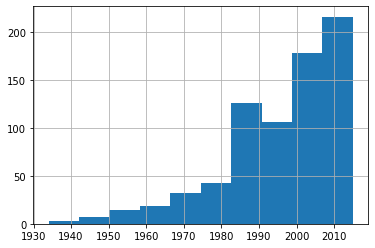

In [19]:
data['yr_renovated'].loc[data['yr_renovated'] != 0].astype('int64').hist()

In [20]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
datefloat        float64
dtype: object

In [21]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
datefloat        0
dtype: int64

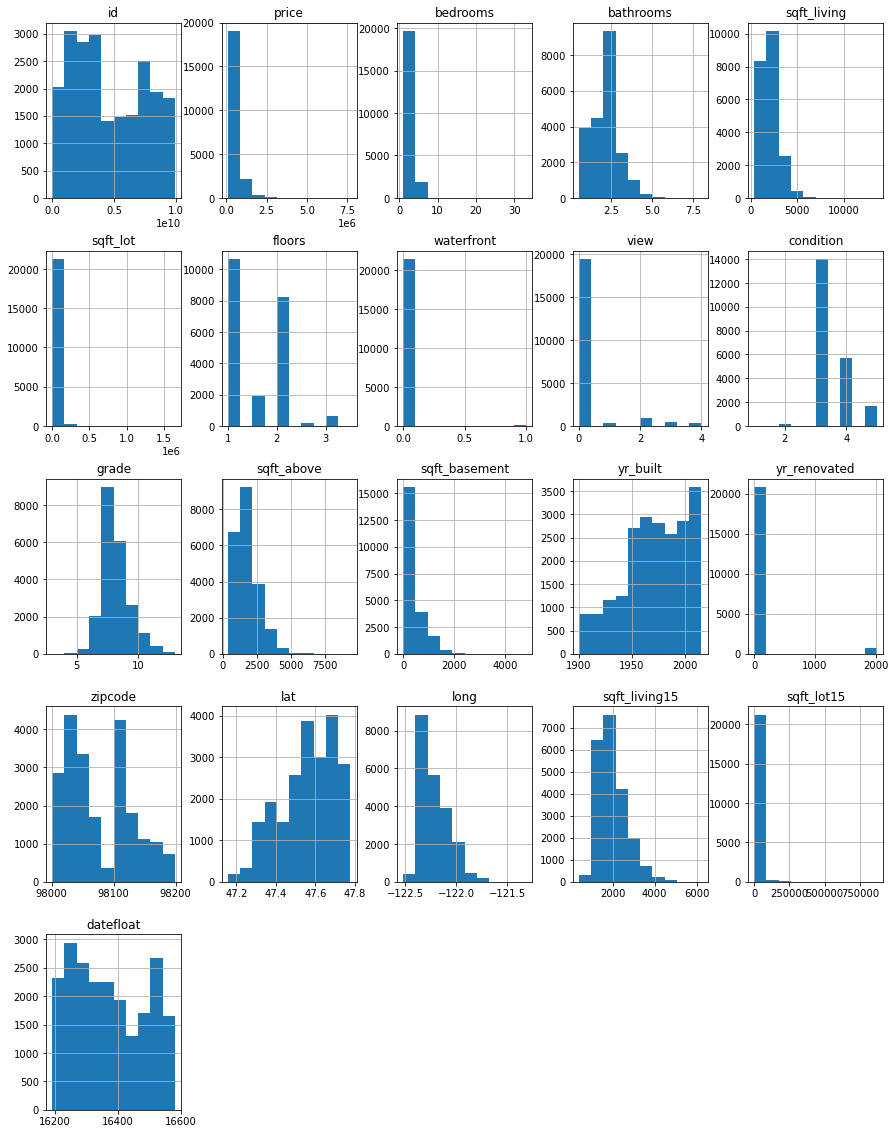

In [22]:
data.hist(figsize = (15,20));

In [23]:
def make_corrs(data, display = False):
    corrs = data.corr().stack().reset_index()
    corrs = corrs.loc[corrs['level_0'] != corrs['level_1']]
    corrs['pair'] = corrs['level_0'] + ' '+ corrs['level_1']
    corrs['pair'] = corrs['pair'].map(lambda x: ', '.join(sorted(x.split(' '))))
    corrs.drop_duplicates(subset = 'pair', inplace = True)
    corrs.drop(['level_1','level_0'], axis = 1, inplace = True)
    corrs.set_index('pair', inplace = True)
    corrs.columns = pd.Series('correlation')
    corrs = abs(corrs).sort_values('correlation', ascending = False)
    if display:
        display(corrs)
    return corrs

make_corrs(data)

,correlation
pair,
"sqft_above, sqft_living",0.876448
"grade, sqft_living",0.762779
"sqft_living, sqft_living15",0.756402
"grade, sqft_above",0.756073
"bathrooms, sqft_living",0.755758
...,...
"lat, sqft_above",0.001199
"bedrooms, id",0.001150
"sqft_living15, yr_renovated",0.000683


In [24]:
def make_high_corrs(data, display = False):
    corrs = make_corrs(data)
    high_corrs = corrs.loc[corrs['correlation']>= 0.75]
    if display:
        display(high_corrs)
    return high_corrs

make_high_corrs(data)

,correlation
pair,
"sqft_above, sqft_living",0.876448
"grade, sqft_living",0.762779
"sqft_living, sqft_living15",0.756402
"grade, sqft_above",0.756073
"bathrooms, sqft_living",0.755758


In [25]:
def make_corrs_with_price(data, display = False):
    corrs = make_corrs(data)
    corrs_with_price = corrs.loc[corrs.index.str.contains('price')]
    if display:
        display(corrs_with_price)
    return corrs_with_price

make_corrs_with_price(data)

,correlation
pair,
"price, sqft_living",0.701917
"grade, price",0.667951
"price, sqft_above",0.605368
"price, sqft_living15",0.585241
"bathrooms, price",0.525906
"price, view",0.393749
"price, sqft_basement",0.325871
"bedrooms, price",0.308787
"lat, price",0.306692


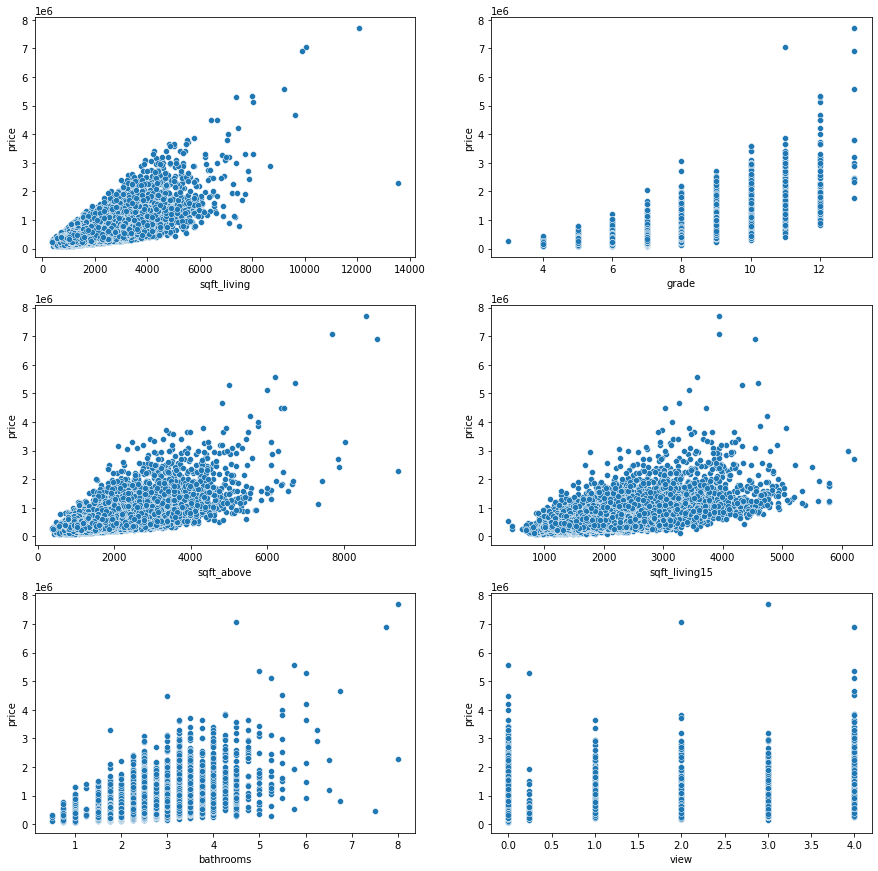

In [26]:
corrs_with_price = make_corrs_with_price(data)

fig, axes = plt.subplots(ncols = 2, nrows = 3, figsize = (15,15))
for pair, ax in zip(corrs_with_price.head(6).index, axes.flatten()):
    x = [val for val in pair.split(', ') if val != 'price'][0]
    sns.scatterplot(data = data, x = data[x], y = data['price'], ax = ax)

In [27]:
def check_homoscedastic(data, display = False):
    results = []
    for col in data.drop('price', axis = 1).columns:
        lower = data[col].quantile(0.45)
        upper = data[col].quantile(0.55)
        mids = data.loc[(data[col] >= lower)&(data[col] <= upper)].index

        index = [x for x in data.index if x not in mids]
        formula = f'price~{col}'
        model = smf.ols(formula = formula, data = data).fit()

        results.append((col, sms.het_goldfeldquandt(model.resid.iloc[index], model.model.exog[index])[1]))

    heteroscedastic = [(col, p) for col, p in results if p < 0.05]
    if display:
        print(heteroscedastic)
    
    return heteroscedastic, results

check_homoscedastic(data.drop('date', axis = 1))[0]

[('long', 0.022365296731784425)]

<AxesSubplot:xlabel='long', ylabel='price'>

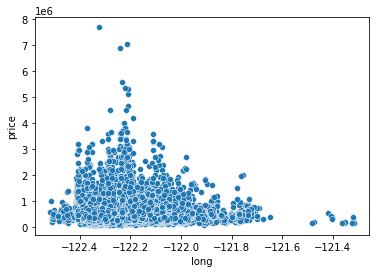

In [28]:
sns.scatterplot(x = 'long', y = 'price', data = data)

In [29]:
data['renovated'] = data['yr_renovated'].map(lambda x: 1 if x>0 else 0)
data['helper'] = data['renovated'].astype('str') + '_' + data['yr_built'].astype('str') + '_' + data['yr_renovated'].astype('str')
data['yr_renovated'] = data['helper'].map(lambda x: int(float(x.split('_')[1+int(x.split('_')[0])])))
data.drop('helper', axis = 1, inplace = True)
data['bath_per_bed'] = data['bathrooms']/data['bedrooms']
data['skinniness'] = data['sqft_living']/data['floors']

In [30]:
(data['yr_renovated'] != data['yr_built']).sum() == data['renovated'].sum()

True

In [31]:
make_corrs_with_price(data)

,correlation
pair,
"price, sqft_living",0.701917
"grade, price",0.667951
"price, sqft_above",0.605368
"price, sqft_living15",0.585241
"bathrooms, price",0.525906
"price, skinniness",0.432429
"price, view",0.393749
"price, sqft_basement",0.325871
"bedrooms, price",0.308787


In [32]:
check_homoscedastic(data.drop('date', axis = 1))[0]

[('long', 0.022365296731784425)]

<AxesSubplot:xlabel='long', ylabel='lat'>

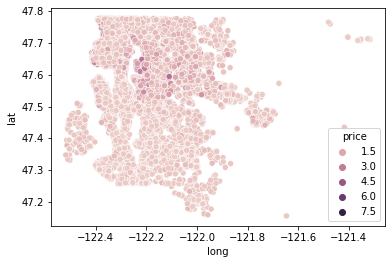

In [33]:
sns.scatterplot(data=data, x='long', y='lat', hue='price')

In [34]:
def corr(x, y):
    xbar = x.mean()
    ybar = y.mean()
    return sum((x-xbar)*(y-ybar))/np.sqrt(sum((x-xbar)**2)*sum((y-ybar)**2))

In [35]:
lats = np.linspace(data['lat'].min(), data['lat'].max(), 75)
longs = np.linspace(data['long'].min(), data['long'].max(), 75)
results = {}

for lat in lats:
    for long in longs:
        distances = np.sqrt((data['lat'] - lat)**2 + (data['long'] - long)**2)
        results[(lat, long)] = abs(corr(distances, data['price']))
        
max(results.values())

0.3789140042194502

In [36]:
inverse_results = dict(zip(results.values(), results.keys()))
best_pair = inverse_results[max(results.values())]
best_pair

(47.64317837837838, -122.17732432432432)

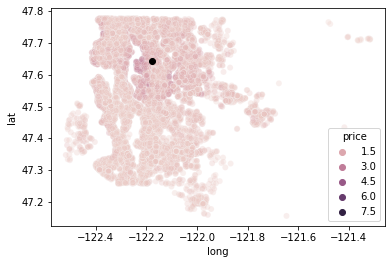

In [37]:
fig, ax = plt.subplots()
sns.scatterplot(data=data, x='long', y='lat', hue='price', ax = ax, alpha = 0.3)
ax.scatter(best_pair[1], best_pair[0], color = 'black')

In [38]:
data['dist'] = np.sqrt((data['lat'] - best_pair[0])**2 + (data['long'] - best_pair[1])**2)

In [39]:
def relevants(data):
    rel = []
    for col in data.columns:
        if data[col].dtype != object:
            rel.append(col)
    return rel

def graphs(data):
    relevant = relevants(data.drop('price', axis = 1))
    rowsplot = int(len(relevant)/2 + 1)

    fig, axes = plt.subplots(nrows = rowsplot, ncols = 2, figsize=(20, 100))

    for col, ax in zip(relevant, axes.flatten()):
        sns.scatterplot(data = data, x = col, y = 'price', ax = ax)
        ax.set_title(col, fontsize = 20)

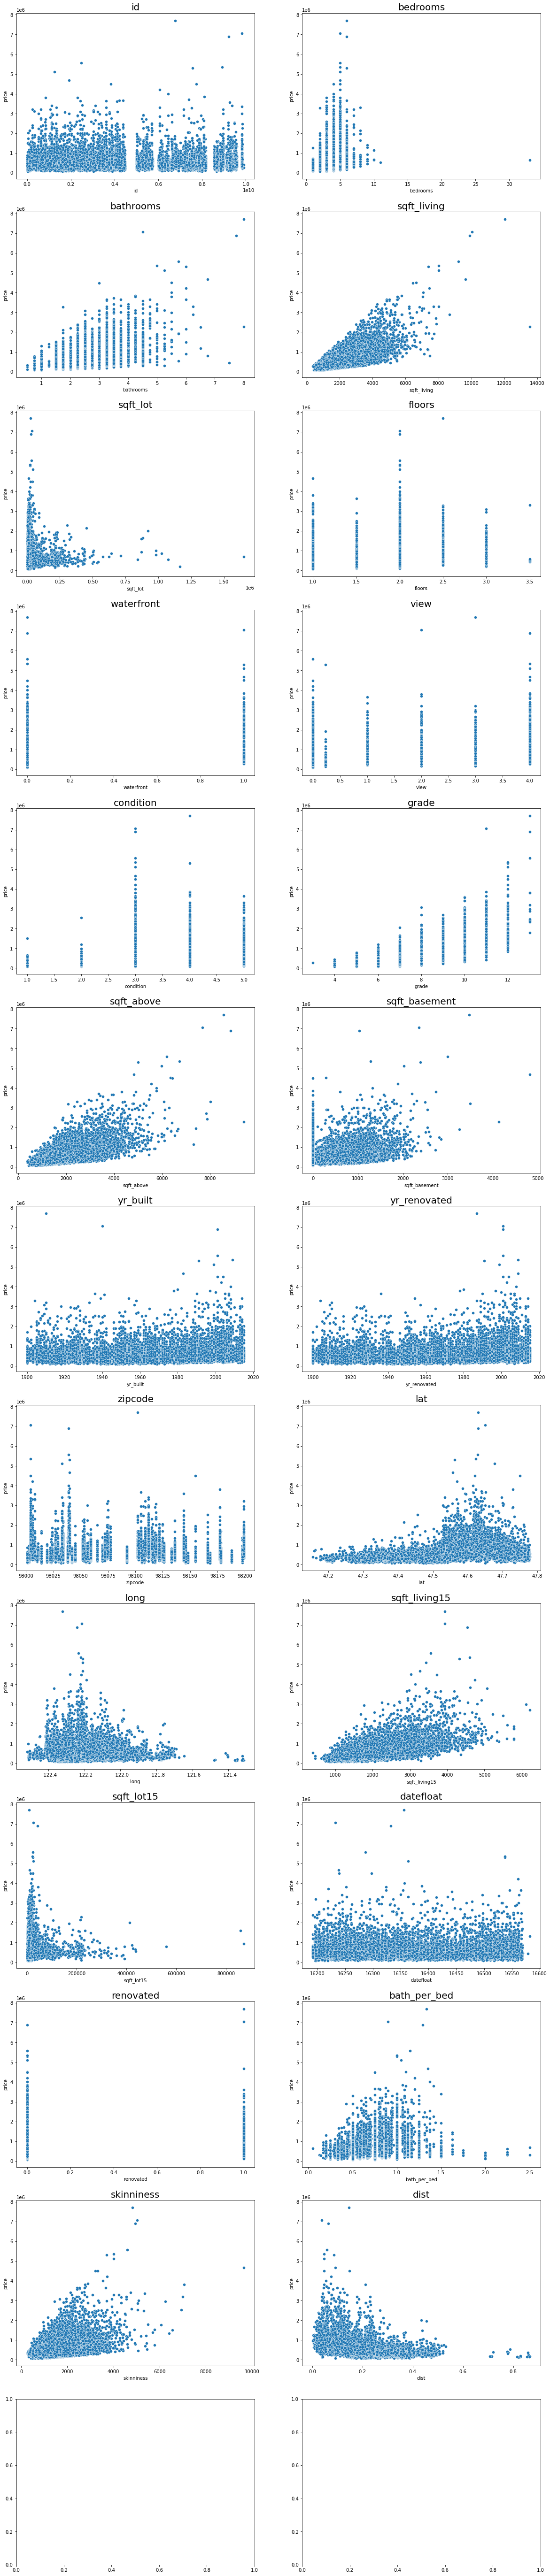

In [40]:
graphs(data)

In [41]:
(data['date'].map(lambda x: int(x[-4:])) >= data['yr_renovated']).value_counts()

True     21579
False       18
dtype: int64

In [42]:
(data['date'].map(lambda x: int(x[-4:])) >= data['yr_built']).value_counts()

True     21585
False       12
dtype: int64

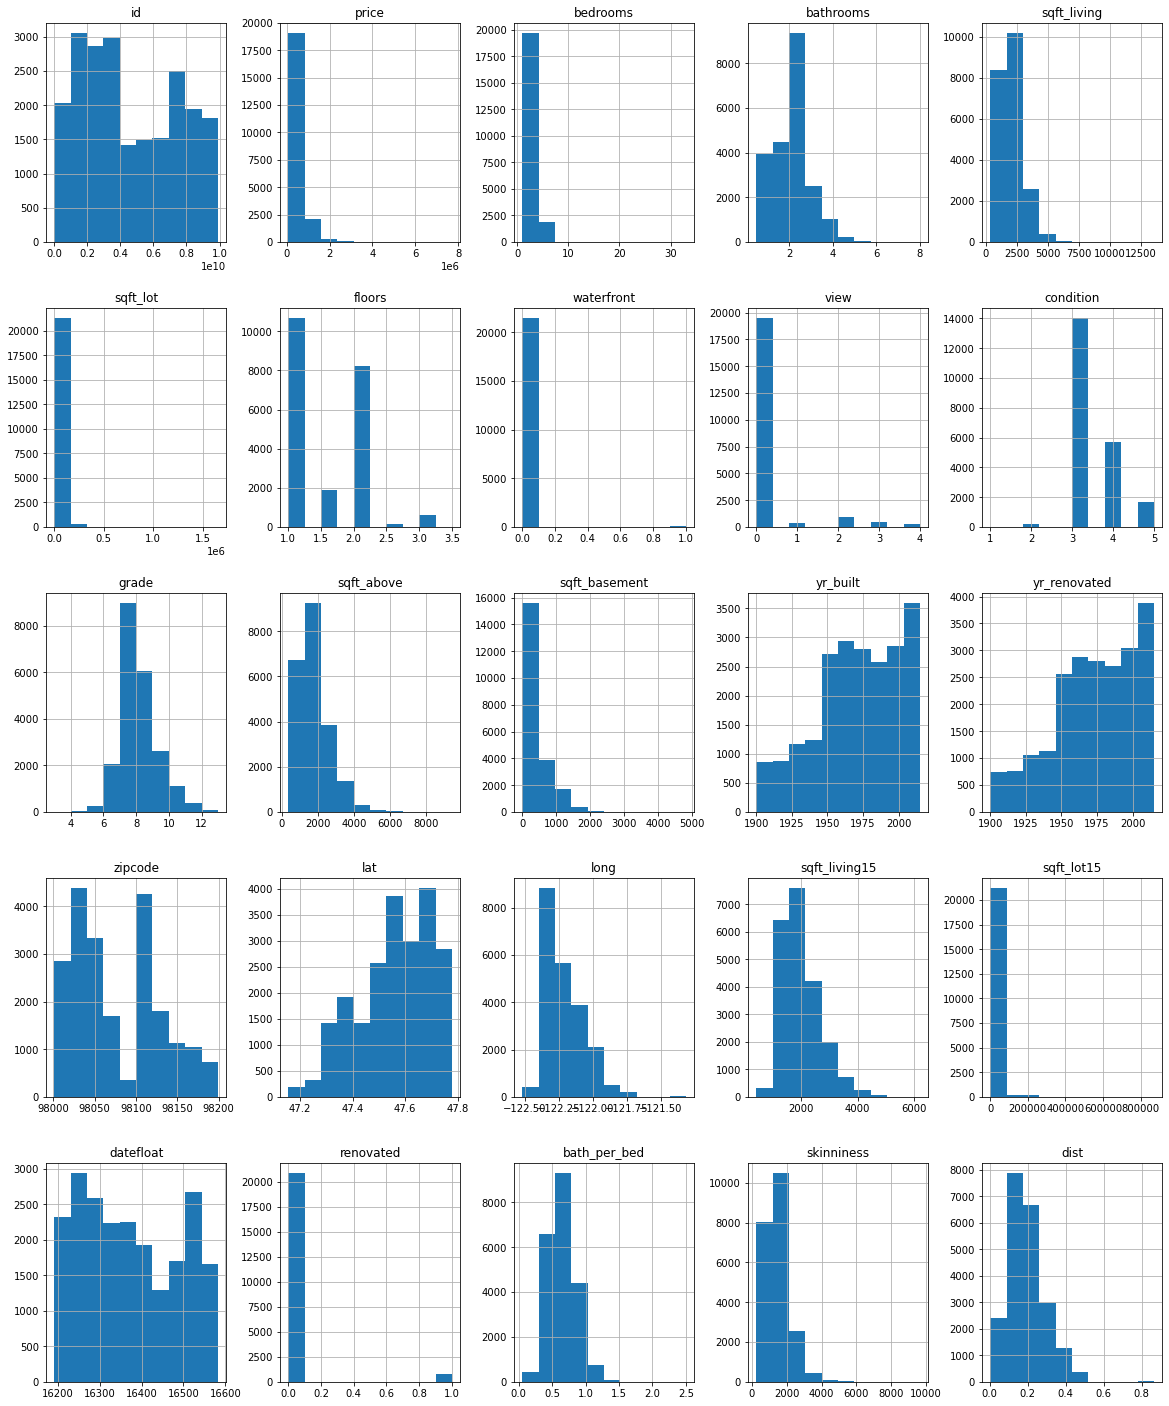

In [43]:
data.hist(figsize = (20, 25));

<AxesSubplot:xlabel='long', ylabel='lat'>

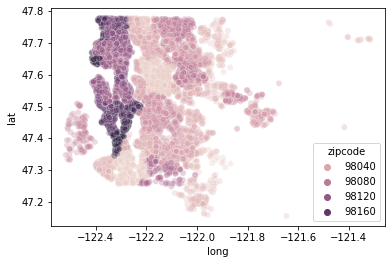

In [44]:
fig, ax = plt.subplots()
sns.scatterplot(data=data, x='long', y='lat', hue='zipcode', ax = ax, alpha = 0.3)

In [47]:
data.to_csv(path_or_buf='../../../data/kc_house_data_update1.csv', index = False)

In [49]:
import pickle
with open('make_corrs.pickle', 'wb') as f:
    pickle.dump(make_corrs, f, pickle.HIGHEST_PROTOCOL)

with open('make_high_corrs.pickle', 'wb') as f:
    pickle.dump(make_high_corrs, f, pickle.HIGHEST_PROTOCOL)
        
with open('make_corrs_with_price.pickle', 'wb') as f:
    pickle.dump(make_corrs_with_price, f, pickle.HIGHEST_PROTOCOL)

with open('make_corrs_with_price.pickle', 'wb') as f:
    pickle.dump(make_corrs_with_price, f, pickle.HIGHEST_PROTOCOL)

with open('check_homoscedastic.pickle', 'wb') as f:
    pickle.dump(check_homoscedastic, f, pickle.HIGHEST_PROTOCOL)
    
with open('corr.pickle', 'wb') as f:
    pickle.dump(corr, f, pickle.HIGHEST_PROTOCOL)
    
with open('relevants.pickle', 'wb') as f:
    pickle.dump(relevants, f, pickle.HIGHEST_PROTOCOL)
    
with open('graphs.pickle', 'wb') as f:
    pickle.dump(graphs, f, pickle.HIGHEST_PROTOCOL)